## Analyzing the performance of the ESG funds across various ESG categories

In [49]:
# Initial imports
import os
import csv
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### 1- Alternative energy sector

In [9]:
# Alternative energy ETFs
alt_tickers = ['FAN', 'PBD', 'SMOG', 'ICLN', 'TAN']
start_date = pd.Timestamp('2015-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-12', tz='America/New_York').isoformat()
timeframe= '1D'

alt_data = api.get_barset(
    alt_tickers,
    timeframe,
    start=start_date,
    end=end_date).df


mc_alternative_energy = MCSimulation(
    portfolio_data = alt_data,
    num_simulation = 100,
    num_trading_days = 252*10 
)
mc_alternative_energy.portfolio_data.head()
mc_alternative_energy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008867,0.998226,1.001740,0.999806,1.002382,0.999726,1.005975,1.001053,1.004815,0.999086,...,0.992605,1.001552,0.994240,0.997775,1.014682,1.007710,1.000740,0.992202,0.995846,1.003633
2,1.010043,0.998639,0.997768,0.995155,1.004743,0.999207,0.998759,1.004389,1.007593,0.996307,...,0.998483,1.001624,0.998788,0.996553,1.028022,1.009633,1.007135,0.995482,0.990479,1.003657
3,1.015979,0.997543,0.996053,0.987809,1.011360,0.998951,1.001956,1.005038,1.012771,0.996097,...,1.012480,0.996608,0.998703,1.005473,1.030511,1.013632,1.013015,0.995241,0.994070,1.006118
4,1.013687,0.988696,0.998019,0.991659,1.019625,1.005053,1.009601,1.009391,1.011200,0.997021,...,1.023931,1.003644,0.999972,1.009924,1.035939,1.003088,1.002543,0.992071,0.990043,1.012047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.039455,2.462388,2.735521,1.992581,3.407315,3.043202,2.413400,2.346218,4.666220,2.136623,...,2.280748,1.847543,3.870546,4.056558,2.607985,2.626169,3.478180,2.313437,2.571207,2.120504
2517,2.045229,2.468713,2.737354,1.996604,3.409827,3.031743,2.392005,2.343269,4.719583,2.131769,...,2.250851,1.858153,3.870437,4.017100,2.593724,2.624466,3.499558,2.315678,2.554250,2.115684
2518,2.054672,2.463255,2.746237,2.003223,3.421763,3.029874,2.387150,2.340346,4.697274,2.144480,...,2.259622,1.855980,3.870396,3.979828,2.601770,2.629614,3.492167,2.316749,2.540183,2.128182
2519,2.055535,2.453763,2.742321,2.024274,3.379950,2.986455,2.398202,2.346550,4.696151,2.159554,...,2.260357,1.851544,3.896592,3.984321,2.599541,2.625894,3.494375,2.342789,2.527364,2.126632


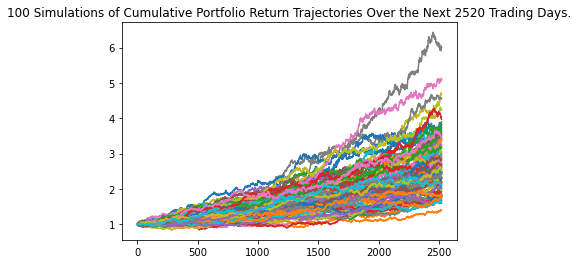

In [10]:
# Plot the Monte Carlo Simulation
mc_alternative_energy_plot= mc_alternative_energy.plot_simulation()

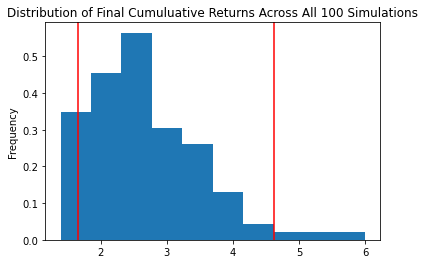

In [11]:
# Cumulative returns distribution
mc_alternative_energy_dist_plot= mc_alternative_energy.plot_distribution()

In [8]:
# Calculate the summary statistics
mc_alternative_energy_summary= mc_alternative_energy.summarize_cumulative_return()

print (mc_alternative_energy_summary)

count           50.000000
mean             1.094891
std              0.103593
min              0.918805
25%              1.028874
50%              1.082618
75%              1.147855
max              1.480183
95% CI Lower     0.926256
95% CI Upper     1.282471
Name: 252, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 10,000 initial investment.

In [13]:
# Set initial investment
alternative_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
alternative_lower= round(mc_alternative_energy_summary[8]* 10000, 2)
alternative_upper= round(mc_alternative_energy_summary[9]* 10000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${alternative_investment} in the alternative energy portfolio"
      f", over the next 10 years will end within in the range of"
      f" ${alternative_lower} and ${alternative_upper}")

There is a 95% chance that an initial investment of $10000 in the alternative energy portfolio, over the next 10 years will end within in the range of $9262.56 and $12824.71


#### 2- Diversity sector

In [15]:
# Diversity ETFs
board_tickers = ['DXGE', 'EWQ', 'NORW', 'HEDJ', 'ZDEU']
board_data = api.get_barset(
    board_tickers,
    timeframe,
    start=start_date,
    end=end_date).df
board_data.head()
mc_board = MCSimulation(
    portfolio_data = board_data,
    num_simulation = 100,
    num_trading_days = 252*10
)
mc_board.portfolio_data.head()
mc_board.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005964,1.005733,0.992839,0.991174,0.998722,1.003374,1.000940,0.996661,1.003079,0.998748,...,1.004433,0.986993,0.997612,0.996785,0.993482,0.990661,0.990754,0.999564,1.000559,0.991399
2,1.007575,1.006768,0.987719,0.991397,0.990247,1.000175,0.995209,0.995943,1.008179,1.000643,...,1.000742,0.991535,1.002448,1.000077,0.999876,0.983665,0.998792,0.995663,1.000793,0.999850
3,0.997564,1.010989,0.983742,0.997133,0.974613,1.001139,0.992591,1.002986,1.008166,1.005709,...,1.000698,0.988784,0.995154,0.995586,0.990069,0.976517,0.993173,1.005043,1.003224,1.000362
4,0.995572,1.012628,0.989895,0.990643,0.981062,0.988722,0.999877,1.020054,1.005713,1.004111,...,0.999560,0.984583,0.995525,1.004609,0.977341,0.973885,0.983906,1.004502,1.003727,0.995669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.465438,2.348649,1.410521,2.042125,2.188474,1.046101,3.015765,1.611655,1.563403,1.282772,...,2.323946,1.711850,2.338049,2.253437,2.110825,1.557156,1.100595,2.373971,1.913026,1.911229
2517,1.464837,2.320190,1.402641,2.046446,2.202103,1.049260,2.984742,1.612002,1.570336,1.277613,...,2.306022,1.715672,2.350799,2.254111,2.101578,1.559028,1.097416,2.376403,1.891792,1.923152
2518,1.479515,2.319543,1.407724,2.035442,2.222109,1.048898,2.967971,1.608159,1.547440,1.272219,...,2.291008,1.707654,2.336408,2.260906,2.082741,1.563714,1.099898,2.364139,1.885638,1.926842
2519,1.486337,2.330350,1.403068,2.042443,2.232112,1.043441,2.997576,1.604344,1.556794,1.262195,...,2.287716,1.704844,2.335151,2.258759,2.069541,1.575780,1.097836,2.365518,1.896193,1.915003


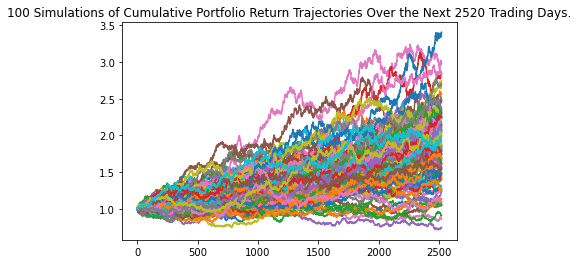

In [18]:
# Plot the Monte Carlo Simulation
mc_board_plot= mc_board.plot_simulation()

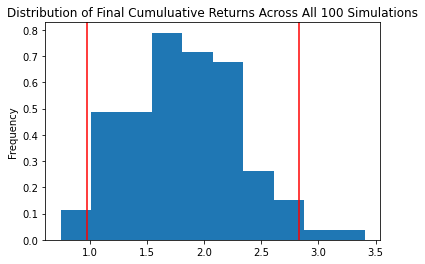

In [19]:
# Cumulative returns distribution
mc_board_dist_plot= mc_board.plot_distribution()

In [20]:
# Calculate the summary statistics
mc_board_summary= mc_board.summarize_cumulative_return()

print (mc_board_summary)

count           100.000000
mean              1.827928
std               0.500250
min               0.744733
25%               1.484995
50%               1.801592
75%               2.158393
max               3.407073
95% CI Lower      0.973563
95% CI Upper      2.830460
Name: 2520, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 10,000 initial investment.

In [21]:
# Set initial investment
diversity_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
diversity_lower= round(mc_board_summary[8]* 10000, 2)
diversity_upper= round(mc_board_summary[9]* 10000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${diversity_investment} in the diversity portfolio"
      f", over the next 10 years will end within in the range of"
      f" ${diversity_lower} and ${diversity_upper}")

There is a 95% chance that an initial investment of $10000 in the diversity portfolio, over the next 10 years will end within in the range of $9735.63 and $28304.6


In [ ]:
# line_plot = MC_stock.plot_simulation()
# dist_plot = MC_stock.plot_distribution()

In [14]:
# even_tbl = MC_stock.summarize_cumulative_return()

# print(even_tbl)

#### 3- Education sector

In [23]:
edu_tickers = ['DGRS', 'FYT', 'PSL', 'FEM', 'FXD']
edu_data = api.get_barset(
    edu_tickers,
    timeframe,
    start=start_date,
    end=end_date).df
edu_data.head()
mc_education = MCSimulation(
    portfolio_data = edu_data,
    num_simulation = 100,
    num_trading_days = 252*10
)
mc_education.portfolio_data.head()
mc_education.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997223,1.006430,1.002689,0.994079,1.009291,0.995230,1.005261,1.008409,1.001168,0.999462,...,0.995839,0.997793,0.993731,1.003171,1.009839,1.001004,0.996019,1.001774,0.997027,0.996377
2,1.000547,1.006688,0.998562,0.992252,1.005203,1.000402,1.006300,1.007279,1.010684,0.993950,...,0.998162,1.003312,0.991838,1.000957,1.006600,1.005489,0.989630,0.997954,1.006172,1.007612
3,0.987138,1.003593,0.996298,0.988840,1.010322,1.000171,1.007340,1.017223,1.011698,0.988867,...,0.999803,1.006730,0.994027,1.002111,1.004890,1.005886,0.998288,1.003082,1.000493,1.014171
4,0.987230,1.004604,0.995670,0.985557,1.008649,1.004305,1.009718,1.017923,1.014146,0.988505,...,1.005948,1.004861,0.993065,0.997090,1.005469,0.995150,1.008186,1.001265,1.008342,1.014715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.072736,1.894919,1.770903,2.806925,2.055040,1.776657,2.985693,2.640845,1.876012,1.975502,...,1.639397,2.269724,2.297465,1.804070,2.504060,1.700121,2.806048,2.948006,1.606139,1.931858
2517,3.080551,1.888437,1.770618,2.820235,2.066847,1.782519,2.997629,2.645626,1.880136,1.962943,...,1.656469,2.282301,2.296267,1.790061,2.521752,1.714777,2.826928,2.959229,1.600729,1.927687
2518,3.075211,1.877570,1.760483,2.834807,2.059835,1.785004,3.002223,2.646578,1.888996,1.979690,...,1.653201,2.288416,2.290811,1.796604,2.507751,1.725973,2.828556,2.964387,1.594281,1.915312
2519,3.085834,1.884762,1.751261,2.816379,2.057937,1.773496,3.009223,2.643462,1.889592,1.980983,...,1.651553,2.303310,2.290966,1.806264,2.521126,1.738223,2.838267,2.959150,1.593450,1.929813


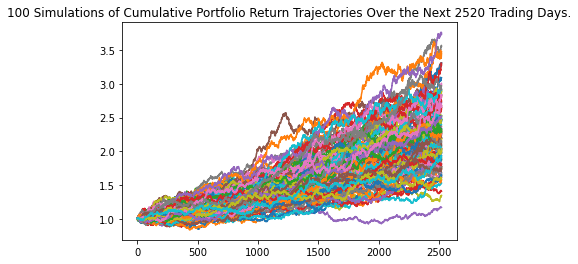

In [24]:
# Plot the Monte Carlo Simulation
mc_education_plot= mc_education.plot_simulation()

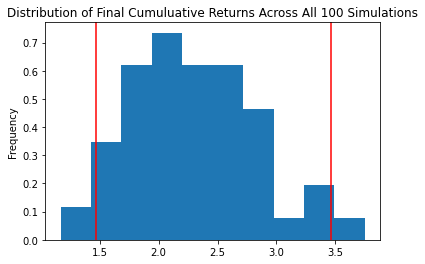

In [25]:
# Cumulative returns distribution
mc_education_dist_plot= mc_education.plot_distribution()

In [26]:
# Calculate the summary statistics
mc_education_summary= mc_education.summarize_cumulative_return()

print (mc_education_summary)

count           100.000000
mean              2.288026
std               0.527515
min               1.167136
25%               1.893568
50%               2.261970
75%               2.651344
max               3.751148
95% CI Lower      1.464774
95% CI Upper      3.462501
Name: 2520, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 10,000 initial investment.

In [27]:
# Set initial investment
education_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
education_lower= round(mc_education_summary[8]* 10000, 2)
education_upper= round(mc_education_summary[9]* 10000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${education_investment} in the education portfolio"
      f", over the next 10 years will end within in the range of"
      f" ${education_lower} and ${education_upper}")

There is a 95% chance that an initial investment of $10000 in the education portfolio, over the next 10 years will end within in the range of $14647.74 and $34625.01


#### 4- Nuclear sector

In [32]:
nuclear_tickers = ['IDU', 'JXI', 'NLR', 'URA', 'XLU']
nuclear_data = api.get_barset(
    nuclear_tickers,
    timeframe,
    start=start_date,
    end=end_date).df
nuclear_data.head()
mc_nuclear = MCSimulation(
    portfolio_data = nuclear_data,
    num_simulation = 100,
    num_trading_days = 252*10
)
mc_nuclear.portfolio_data.head()
mc_nuclear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995377,0.998978,0.997825,1.008983,1.003395,1.009283,0.995922,0.991818,0.995473,1.004273,...,1.001555,0.997754,1.003202,1.004471,1.005437,0.995717,1.000726,0.993830,0.996590,1.004968
2,0.991576,0.997986,1.007340,1.012625,1.005341,1.002709,0.998479,0.992719,0.992176,1.006632,...,1.012523,1.004459,1.003926,0.997457,1.002839,0.989495,1.006581,0.999501,0.993896,1.005327
3,0.990218,0.999819,1.012876,1.002104,1.001843,1.007359,1.001250,0.991754,0.997863,1.016059,...,1.011218,1.004169,1.014359,0.997562,1.007667,0.984392,1.006939,0.994250,0.991390,1.001669
4,0.987792,1.000520,1.022746,1.005498,1.005055,1.001784,1.004243,0.991807,0.997589,1.017732,...,1.016391,0.993339,1.018276,0.993094,1.014956,0.991639,1.005267,0.993558,1.001126,0.998952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.156220,1.457521,1.433840,1.241025,2.646164,1.389630,1.992546,1.611065,2.608812,1.935082,...,1.678356,1.640429,2.341820,2.233575,1.897489,2.027004,1.710546,2.518890,1.502040,1.398103
2517,1.153566,1.460377,1.426004,1.250725,2.654389,1.390498,2.001644,1.620065,2.595254,1.935341,...,1.678724,1.615163,2.354872,2.236445,1.908740,2.028165,1.700561,2.524450,1.507606,1.394242
2518,1.154531,1.459897,1.434048,1.248455,2.642087,1.402878,2.007931,1.614117,2.612823,1.925096,...,1.672219,1.615423,2.361991,2.232062,1.909526,2.023607,1.691586,2.525133,1.501222,1.383772
2519,1.154816,1.455529,1.432085,1.236555,2.660565,1.400117,2.007601,1.620169,2.606993,1.925222,...,1.673489,1.630751,2.358480,2.220464,1.909246,2.015568,1.694968,2.529787,1.512925,1.386071


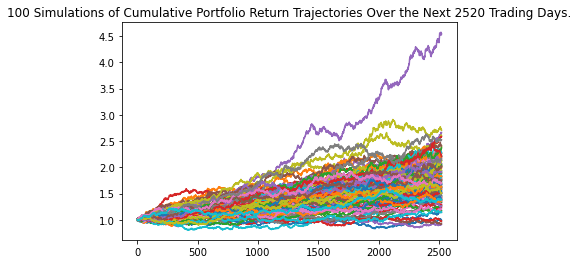

In [33]:
# Plot the Monte Carlo Simulation
mc_nuclear_plot= mc_nuclear.plot_simulation()

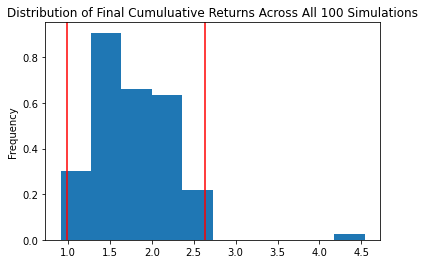

In [34]:
# Cumulative returns distribution
mc_nuclear_plot= mc_nuclear.plot_distribution()

In [35]:
# Calculate the summary statistics
mc_nuclear_summary= mc_nuclear.summarize_cumulative_return()

print (mc_nuclear_summary)

count           100.000000
mean              1.775071
std               0.494328
min               0.910016
25%               1.428116
50%               1.704546
75%               2.038439
max               4.542930
95% CI Lower      0.984019
95% CI Upper      2.635151
Name: 2520, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 10,000 initial investment.

In [36]:
# Set initial investment
nuclear_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
nuclear_lower= round(mc_nuclear_summary[8]* 10000, 2)
nuclear_upper= round(mc_nuclear_summary[9]* 10000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${nuclear_investment} in the nuclear portfolio"
      f", over the next 10 years will end within in the range of"
      f" ${nuclear_lower} and ${nuclear_upper}")

There is a 95% chance that an initial investment of $10000 in the nuclear portfolio, over the next 10 years will end within in the range of $9840.19 and $26351.51


#### 5- Disease treatment sector

In [37]:
treatment_tickers = ['BBH', 'BBP', 'BIB', 'FBT', 'IBB']
treatment_data = api.get_barset(
    treatment_tickers,
    timeframe,
    start=start_date,
    end=end_date).df
treatment_data.head()
mc_treatment = MCSimulation(
    portfolio_data = treatment_data,
    num_simulation = 100,
    num_trading_days = 252*10
)
mc_treatment.portfolio_data.head()
mc_treatment.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013272,1.010412,1.017992,1.016945,1.012801,1.004961,1.002060,0.990733,1.005777,0.996794,...,0.988673,0.969927,0.984442,1.004280,0.994408,1.003593,0.982186,1.016019,0.986778,1.016680
2,1.005977,1.018649,1.001707,1.027707,1.005937,0.988057,1.022146,0.987765,1.023386,1.000662,...,0.988935,0.979604,0.973950,1.018691,1.014844,1.009198,0.963255,1.021947,0.999236,1.000974
3,0.985348,1.026824,1.000473,1.034919,1.004193,0.988380,1.027176,0.988370,1.015948,0.986526,...,1.003578,1.018362,0.960632,1.022744,1.011735,1.011665,0.992182,1.050654,1.042546,1.009732
4,0.966966,1.015284,0.995040,1.046691,0.983545,0.975132,1.033552,0.983701,1.006701,0.973746,...,1.021532,1.013609,0.965890,1.005795,1.008194,0.987524,1.007062,1.076276,1.033712,1.010432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.237606,2.035723,11.500586,40.193057,0.683421,9.684221,2.129636,6.696627,5.561499,2.915237,...,1.492459,2.893795,3.413876,5.152374,6.404862,1.638825,1.425131,2.102797,3.772976,3.092869
2517,3.355080,1.989773,11.397552,40.627783,0.699126,9.431188,2.160479,6.713536,5.792726,2.962704,...,1.488180,2.837356,3.375043,5.150828,6.512041,1.657708,1.427868,2.128494,3.851108,3.132365
2518,3.361928,1.975961,11.231287,41.350274,0.708158,9.406281,2.140960,6.851262,5.740187,3.005229,...,1.444168,2.757025,3.343866,5.306815,6.498842,1.672292,1.447135,2.126761,3.964988,3.096780
2519,3.292617,1.982105,11.221855,41.298260,0.722960,9.483281,2.140880,6.951376,5.672755,2.952303,...,1.432434,2.783386,3.343607,5.308538,6.588517,1.612280,1.442479,2.178069,4.025664,3.159180


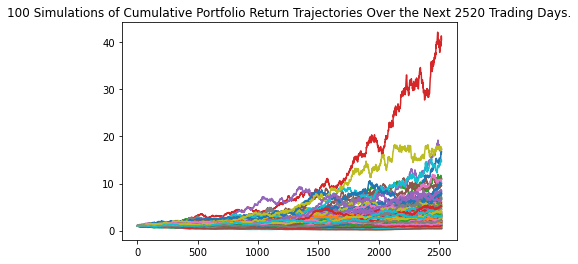

In [38]:
# Plot the Monte Carlo Simulation
mc_treatment_plot= mc_treatment.plot_simulation()

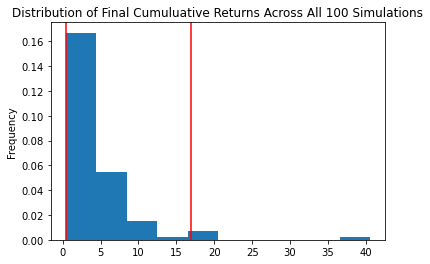

In [39]:
# Cumulative returns distribution
mc_treatment_dist_plot= mc_treatment.plot_distribution()

In [40]:
# Calculate the summary statistics
mc_treatment_summary= mc_treatment.summarize_cumulative_return()

print (mc_treatment_summary)

count           100.000000
mean              4.453002
std               5.129621
min               0.420421
25%               1.756802
50%               3.090189
75%               5.357068
max              40.550555
95% CI Lower      0.481147
95% CI Upper     16.992620
Name: 2520, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 10,000 initial investment.

In [41]:
# Set initial investment
treatment_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
treatment_lower= round(mc_treatment_summary[8]* 10000, 2)
treatment_upper= round(mc_treatment_summary[9]* 10000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${treatment_investment} in the disease treatment portfolio"
      f", over the next 10 years will end within in the range of"
      f" ${treatment_lower} and ${treatment_upper}")

There is a 95% chance that an initial investment of $10000 in the disease treatment portfolio, over the next 10 years will end within in the range of $4811.47 and $169926.2


#### 6- Green building sector

In [42]:
green_tickers = ['DRW', 'IFGL', 'RWO', 'RWX', 'WPS']
green_data = api.get_barset(
    green_tickers,
    timeframe,
    start=start_date,
    end=end_date).df
green_data.head()
mc_green = MCSimulation(
    portfolio_data = green_data,
    num_simulation = 100,
    num_trading_days = 252*10
)
mc_green.portfolio_data.head()
mc_green.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006841,0.999302,1.006502,0.996465,0.993711,1.010401,1.008048,1.011105,1.003704,0.996703,...,1.004387,0.982135,0.999231,0.995955,0.995598,1.017118,0.999562,1.007619,1.005765,1.004777
2,0.990465,1.006027,1.002148,0.993989,1.004785,1.005396,1.003523,1.025494,0.986046,0.993721,...,0.992728,0.984800,1.005497,1.011815,1.002623,1.013646,0.992147,1.007180,0.991935,0.996376
3,0.984695,1.002627,1.003023,0.996614,1.005141,0.999843,1.011912,1.039238,0.982441,0.990483,...,0.996958,0.994377,0.998628,1.008477,0.994786,1.014933,0.981034,1.016218,0.988320,1.013268
4,0.981697,1.000622,1.008072,1.004018,0.999237,1.001666,1.017464,1.030464,0.974159,0.991432,...,1.010589,0.995613,1.009556,0.997934,0.986470,1.014723,0.981929,1.019394,0.986809,1.001095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.266482,1.098843,2.380362,2.108616,3.179361,1.246203,1.524657,1.432491,2.685498,1.436834,...,2.482470,3.729852,2.368470,1.892015,2.304623,2.635383,2.489723,1.895937,1.804696,2.058553
2517,1.266271,1.090941,2.362469,2.127898,3.208625,1.265019,1.514697,1.427911,2.702843,1.423572,...,2.480578,3.762337,2.354743,1.903588,2.313287,2.606502,2.510974,1.898567,1.800769,2.094370
2518,1.268489,1.086568,2.348334,2.122939,3.224867,1.263355,1.519905,1.419280,2.705134,1.410802,...,2.446768,3.758585,2.373653,1.909092,2.304206,2.601327,2.530322,1.905025,1.815791,2.111335
2519,1.271367,1.085197,2.297266,2.149637,3.260584,1.249604,1.510501,1.415053,2.680647,1.401045,...,2.422347,3.779256,2.385401,1.904221,2.313399,2.608101,2.482497,1.899970,1.782125,2.110322


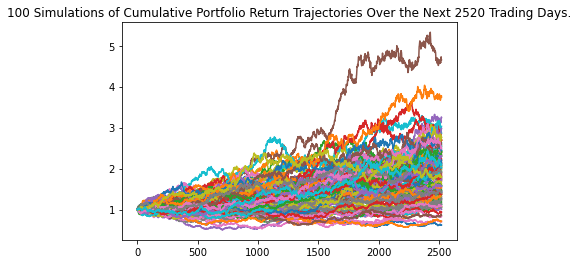

In [43]:
# Plot the Monte Carlo Simulation
mc_green_plot= mc_green.plot_simulation()

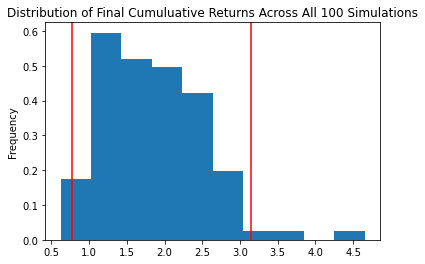

In [44]:
# Cumulative returns distribution
mc_green_dist_plot= mc_green.plot_distribution()

In [45]:
# Calculate the summary statistics
mc_green_summary= mc_green.summarize_cumulative_return()

print (mc_green_summary)

count           100.000000
mean              1.856423
std               0.684197
min               0.622236
25%               1.373071
50%               1.791260
75%               2.327741
max               4.654935
95% CI Lower      0.771727
95% CI Upper      3.143352
Name: 2520, dtype: float64


#### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 10,000 initial investment.

In [46]:
# Set initial investment
green_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000
green_lower= round(mc_green_summary[8]* 10000, 2)
green_upper= round(mc_green_summary[9]* 10000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${green_investment} in the green building portfolio"
      f", over the next 10 years will end within in the range of"
      f" ${green_lower} and ${green_upper}")

There is a 95% chance that an initial investment of $10000 in the green building portfolio, over the next 10 years will end within in the range of $7717.27 and $31433.52
